In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [8]:
# http://dx.doi.org/10.1016/j.energy.2016.02.062
# /!\ INSULATED PIPES -> only for HTDHN ?

r_chf_eur = 1.21  # [CHF/EUR]

raw_table = [
    [20, 226, 165],
    [25, 231, 165],
    [32, 257, 165],
    [40, 272, 165],
    [50, 293, 202],
    [65, 335, 202],
    [80, 376, 240],
    [100, 504, 256],
    [125, 640, 273],
    [150, 791, 310],
    [200, 960, 351],
    [250, 1363, 393],
]

df = pd.DataFrame(raw_table, columns=["DN", "Pipe", "Trench"])
df[["Pipe", "Trench"]] *= r_chf_eur
df["Total"] = df.Pipe + df.Trench
df

DN     Pipe  Trench    Total
0    20   273.46  199.65   473.11
1    25   279.51  199.65   479.16
2    32   310.97  199.65   510.62
3    40   329.12  199.65   528.77
4    50   354.53  244.42   598.95
5    65   405.35  244.42   649.77
6    80   454.96  290.40   745.36
7   100   609.84  309.76   919.60
8   125   774.40  330.33  1104.73
9   150   957.11  375.10  1332.21
10  200  1161.60  424.71  1586.31
11  250  1649.23  475.53  2124.76

In [4]:
popt_1st_pipe, _ = curve_fit(
    lambda x, a, b: a * x + b, df.DN, df.Pipe, (1, 1)
)

popt_2nd_pipe, _ = curve_fit(
    lambda x, a, b, c: a * x ** 2 + b * x + c, df.DN, df.Pipe, (1, 1, 1)
)

In [5]:
popt_1st_tren, _ = curve_fit(
    lambda x, a, b: a * x + b, df.DN, df.Trench, (1, 1)
)

popt_2nd_tren, _ = curve_fit(
    lambda x, a, b, c: a * x ** 2 + b * x + c, df.DN, df.Trench, (1, 1, 1)
)

<IPython.core.display.Javascript object>


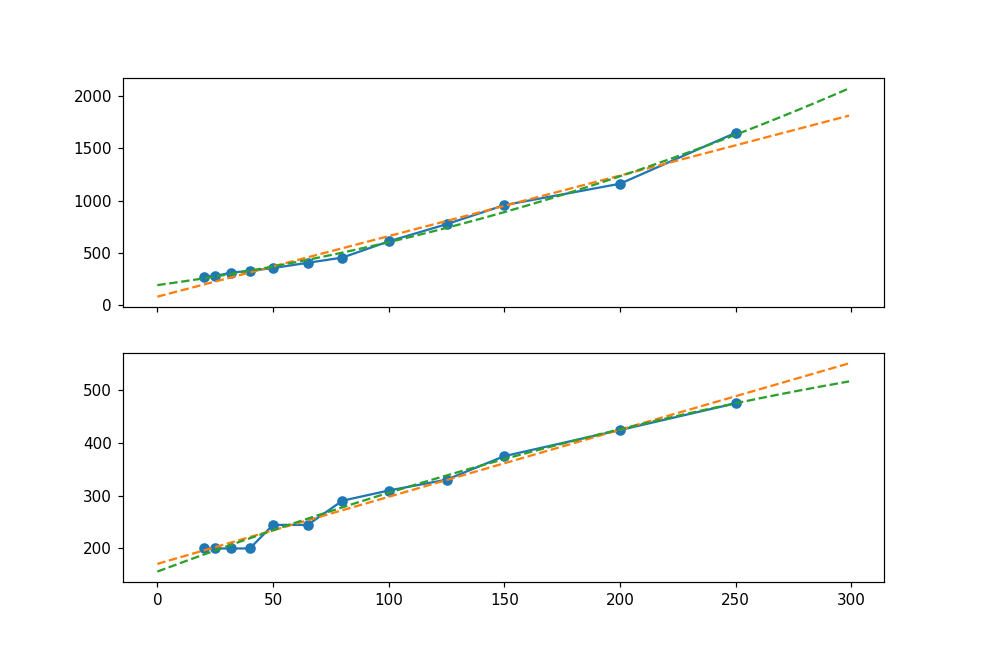

In [7]:
fig, ax = plt.subplots(2, sharex=True, figsize=(9, 6))

x = range(0, 300)

ax[0].plot(df.DN, df.Pipe, "-o")

ax[0].plot(x, popt_1st_pipe[0]*x + popt_1st_pipe[1], '--')
ax[0].plot(x, popt_2nd_pipe[0]*x*x + popt_2nd_pipe[1]*x + popt_2nd_pipe[2], '--')

ax[1].plot(df.DN, df.Trench, "-o")

ax[1].plot(x, popt_1st_tren[0]*x + popt_1st_tren[1], '--')
ax[1].plot(x, popt_2nd_tren[0]*x*x + popt_2nd_tren[1]*x + popt_2nd_tren[2], '--')